In [641]:
from save_csv import results_to_csv
import scipy.io as sio
import numpy as np
import numpy.random as sample
import pandas as pd
import matplotlib.pyplot as plt  
import numpy.linalg as la
from scipy.special import expit
norm = la.norm

## Collectinig Wine Data

In [755]:
data_contents = sio.loadmat('data.mat')
X = data_contents['X']
ones = [[1] for _ in range(X.shape[0])]
X = np.append(X,ones,1)
y = np.array([val[0] for val in data_contents['y']])
X_test = data_contents['X_test']
y = np.array([[v] for v in y])
X = np.append(X,y,1)
np.random.shuffle(X)
X,y = np.array([row[:-1] for row in X]),np.array([row[-1] for row in X])  
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:]
y_val = y[5000:]

## (a) Gradient Descent

In [858]:
n = X_train.shape[0]
d = X_train.shape[1]
w = np.array([0]*d)
e = 0.0000009
lam = 0.05
alpha = 0.000001
s = np.array([expit(np.dot(X_train[i],w)) for i in range(n)])

In [855]:
def update(X,y,w,e,s):
    w = w - e * (2*lam*w - np.matmul(X.T,y-s))
    s = np.array([expit(np.dot(X[i],w)) for i in range(n)])
    return w,s

In [817]:
def stochastic_update(X,w,e,s,y,i):
    w = w - e * (2*lam*w - (y[i]-s[i])*X[i])
    s = np.array([expit(np.dot(X[i],w)) for i in range(n)])
    return w,s

In [818]:
# def not_finished(w0,w1, alpha):
#     diff = abs(norm(w0)-norm(w1))
#     print('Diff: ' + str(diff))
#     return diff > alpha

In [819]:
def cost(y,w,lam,s):
    Sum = sum([y[i]*np.log(s[i]) + (1-y[i])*np.log(1-s[i]) for i in range(n)])
    res = lam*np.dot(w,w) - Sum
    print('Cost: ' + str(res))
    return res

In [859]:
def compute_accuracy(X,w,y):
    correct = 0
    total = 0
    for i in range(len(X)):
        total += 1
        a = np.dot(X[i],w)
        s = expit(a)
        p = 1 if s >= 0.5 else 0
        if p == y[i]:
            correct += 1
    return correct / total

In [860]:
costs  = []
# working parameters: alpha = 0.0001, e = 0.0000005, lam = 0.005
prev_acc = float('inf')
acc = 1
strikes = 0
# initialize
max_acc = -float('inf')
max_w = []
w_prev = np.array([-2]*d)
while strikes < 5000:
    prev_acc = acc
    costs.append(cost(y_train,w,lam,s))
    w_prev = w
    w,s = update(X_train,y_train,w_prev,e,s)
    acc = compute_accuracy(X_val,w, y_val)
    if acc < prev_acc:
        strikes += 1
    if acc > max_acc:
        max_acc = acc
        max_w = w
    print("Accuracy: " + str(acc))


Cost: 3465.7359027999587
Accuracy: 0.73
Cost: 13395.287186086014
Accuracy: 0.73
Cost: 9907.239248761482
Accuracy: 0.73
Cost: 6468.309919588807
Accuracy: 0.731
Cost: 3214.5702705647363
Accuracy: 0.932
Cost: 2193.0588821889887
Accuracy: 0.73
Cost: 6623.134006268208
Accuracy: 0.741
Cost: 3382.0145840315267
Accuracy: 0.917
Cost: 1623.055512575585
Accuracy: 0.767
Cost: 2687.1536312737544
Accuracy: 0.858
Cost: 2320.9099996016503
Accuracy: 0.731
Cost: 7765.553758422733
Accuracy: 0.742
Cost: 4472.146683975915
Accuracy: 0.849
Cost: 1742.1831011176637
Accuracy: 0.643
Cost: 3036.1271498553047
Accuracy: 0.73
Cost: 11362.558066886488
Accuracy: 0.733
Cost: 7946.265073530843
Accuracy: 0.758
Cost: 4689.015270920365
Accuracy: 0.852
Cost: 1943.986152833391
Accuracy: 0.817
Cost: 2107.6068411498327
Accuracy: 0.744
Cost: 6399.35217997659
Accuracy: 0.808
Cost: 3337.459946073389
Accuracy: 0.92
Cost: 1279.4163034922153
Accuracy: 0.917
Cost: 1469.8740379827245
Accuracy: 0.833
Cost: 2737.8647845321357
Accuracy:

Accuracy: 0.929
Cost: 1278.0937239700766
Accuracy: 0.912
Cost: 1138.80880691623
Accuracy: 0.929
Cost: 1275.729532990639
Accuracy: 0.912
Cost: 1137.8944619414917
Accuracy: 0.929
Cost: 1273.411829220311
Accuracy: 0.912
Cost: 1136.990282482428
Accuracy: 0.929
Cost: 1271.1392536529552
Accuracy: 0.912
Cost: 1136.0960282209455
Accuracy: 0.929
Cost: 1268.9104966274272
Accuracy: 0.912
Cost: 1135.2114667133192
Accuracy: 0.929
Cost: 1266.724295657283
Accuracy: 0.912
Cost: 1134.3363730538797
Accuracy: 0.929
Cost: 1264.5794333726062
Accuracy: 0.912
Cost: 1133.4705295562471
Accuracy: 0.929
Cost: 1262.4747355671732
Accuracy: 0.912
Cost: 1132.6137254512992
Accuracy: 0.929
Cost: 1260.4090693448861
Accuracy: 0.912
Cost: 1131.7657566006044
Accuracy: 0.929
Cost: 1258.3813413597184
Accuracy: 0.912
Cost: 1130.9264252245134
Accuracy: 0.929
Cost: 1256.390496143741
Accuracy: 0.912
Cost: 1130.0955396440309
Accuracy: 0.928
Cost: 1254.435514518231
Accuracy: 0.912
Cost: 1129.272914035614
Accuracy: 0.928
Cost: 125

Cost: 1075.4313186325592
Accuracy: 0.936
Cost: 1154.8848958712958
Accuracy: 0.921
Cost: 1074.968278414917
Accuracy: 0.936
Cost: 1154.2269536507633
Accuracy: 0.921
Cost: 1074.5070533548924
Accuracy: 0.936
Cost: 1153.5735818043308
Accuracy: 0.921
Cost: 1074.047621390796
Accuracy: 0.936
Cost: 1152.92469849078
Accuracy: 0.921
Cost: 1073.5899608664602
Accuracy: 0.936
Cost: 1152.2802236444588
Accuracy: 0.921
Cost: 1073.1340505226653
Accuracy: 0.936
Cost: 1151.640078932318
Accuracy: 0.921
Cost: 1072.6798694887998
Accuracy: 0.936
Cost: 1151.0041877120248
Accuracy: 0.921
Cost: 1072.2273972746668
Accuracy: 0.936
Cost: 1150.3724749912876
Accuracy: 0.921
Cost: 1071.7766137625315
Accuracy: 0.936
Cost: 1149.744867388249
Accuracy: 0.922
Cost: 1071.327499199346
Accuracy: 0.936
Cost: 1149.121293093062
Accuracy: 0.922
Cost: 1070.8800341891554
Accuracy: 0.936
Cost: 1148.5016818304034
Accuracy: 0.922
Cost: 1070.4341996856924
Accuracy: 0.936
Cost: 1147.8859648230532
Accuracy: 0.922
Cost: 1069.9899769850895

Cost: 1102.7672351060087
Accuracy: 0.926
Cost: 1034.9731661863127
Accuracy: 0.938
Cost: 1102.3399925176632
Accuracy: 0.926
Cost: 1034.6266354831077
Accuracy: 0.938
Cost: 1101.9138225825159
Accuracy: 0.926
Cost: 1034.280848812519
Accuracy: 0.938
Cost: 1101.488714303927
Accuracy: 0.926
Cost: 1033.9358018831842
Accuracy: 0.938
Cost: 1101.0646568828754
Accuracy: 0.926
Cost: 1033.5914904604888
Accuracy: 0.938
Cost: 1100.6416397139842
Accuracy: 0.926
Cost: 1033.2479103655962
Accuracy: 0.938
Cost: 1100.2196523817165
Accuracy: 0.927
Cost: 1032.9050574744317
Accuracy: 0.938
Cost: 1099.7986846566216
Accuracy: 0.927
Cost: 1032.5629277167584
Accuracy: 0.938
Cost: 1099.3787264916332
Accuracy: 0.927
Cost: 1032.2215170751947
Accuracy: 0.938
Cost: 1098.9597680184745
Accuracy: 0.927
Cost: 1031.8808215843185
Accuracy: 0.938
Cost: 1098.5417995441142
Accuracy: 0.927
Cost: 1031.5408373297412
Accuracy: 0.938
Cost: 1098.124811547318
Accuracy: 0.927
Cost: 1031.2015604472417
Accuracy: 0.938
Cost: 1097.70879467

Cost: 1003.4742930403976
Accuracy: 0.937
Cost: 1063.7753984783283
Accuracy: 0.928
Cost: 1003.1872645340962
Accuracy: 0.937
Cost: 1063.4226207896616
Accuracy: 0.928
Cost: 1002.9007236462397
Accuracy: 0.937
Cost: 1063.0703798600696
Accuracy: 0.928
Cost: 1002.6146688451436
Accuracy: 0.937
Cost: 1062.7186734723293
Accuracy: 0.928
Cost: 1002.3290986104284
Accuracy: 0.937
Cost: 1062.3674994376245
Accuracy: 0.928
Cost: 1002.0440114328285
Accuracy: 0.937
Cost: 1062.0168555950488
Accuracy: 0.928
Cost: 1001.7594058140863
Accuracy: 0.937
Cost: 1061.6667398110985
Accuracy: 0.928
Cost: 1001.4752802667568
Accuracy: 0.937
Cost: 1061.3171499791788
Accuracy: 0.928
Cost: 1001.1916333140696
Accuracy: 0.937
Cost: 1060.9680840190906
Accuracy: 0.928
Cost: 1000.9084634898028
Accuracy: 0.937
Cost: 1060.619539876594
Accuracy: 0.928
Cost: 1000.6257693381007
Accuracy: 0.937
Cost: 1060.2715155229303
Accuracy: 0.928
Cost: 1000.3435494133719
Accuracy: 0.938
Cost: 1059.9240089543284
Accuracy: 0.928
Cost: 1000.061802

Accuracy: 0.938
Cost: 1030.264580183799
Accuracy: 0.924
Cost: 976.2401475275037
Accuracy: 0.938
Cost: 1029.9584447276886
Accuracy: 0.924
Cost: 975.9967796903592
Accuracy: 0.938
Cost: 1029.6527078817405
Accuracy: 0.924
Cost: 975.7537818636866
Accuracy: 0.938
Cost: 1029.3473687929475
Accuracy: 0.924
Cost: 975.5111531735793
Accuracy: 0.938
Cost: 1029.0424266134944
Accuracy: 0.924
Cost: 975.2688927496428
Accuracy: 0.938
Cost: 1028.7378805006967
Accuracy: 0.924
Cost: 975.0269997249192
Accuracy: 0.938
Cost: 1028.4337296169106
Accuracy: 0.924
Cost: 974.7854732359186
Accuracy: 0.938
Cost: 1028.1299731294653
Accuracy: 0.924
Cost: 974.5443124225401
Accuracy: 0.938
Cost: 1027.8266102106145
Accuracy: 0.924
Cost: 974.3035164280669
Accuracy: 0.938
Cost: 1027.523640037429
Accuracy: 0.924
Cost: 974.063084399139
Accuracy: 0.938
Cost: 1027.221061791758
Accuracy: 0.924
Cost: 973.8230154857138
Accuracy: 0.938
Cost: 1026.9188746601537
Accuracy: 0.924
Cost: 973.5833088410442
Accuracy: 0.939
Cost: 1026.61707

Cost: 953.1853303916147
Accuracy: 0.94
Cost: 1000.6936513970528
Accuracy: 0.927
Cost: 952.9757028928146
Accuracy: 0.94
Cost: 1000.4247712790135
Accuracy: 0.927
Cost: 952.76637047941
Accuracy: 0.94
Cost: 1000.156220319846
Accuracy: 0.927
Cost: 952.5573325304695
Accuracy: 0.94
Cost: 999.887997968487
Accuracy: 0.927
Cost: 952.3485884268468
Accuracy: 0.94
Cost: 999.620103675507
Accuracy: 0.927
Cost: 952.140137551203
Accuracy: 0.941
Cost: 999.3525368930999
Accuracy: 0.927
Cost: 951.931979287956
Accuracy: 0.941
Cost: 999.0852970750605
Accuracy: 0.927
Cost: 951.7241130232978
Accuracy: 0.941
Cost: 998.8183836767851
Accuracy: 0.927
Cost: 951.5165381451736
Accuracy: 0.941
Cost: 998.5517961552296
Accuracy: 0.927
Cost: 951.3092540432835
Accuracy: 0.941
Cost: 998.2855339689463
Accuracy: 0.927
Cost: 951.1022601090572
Accuracy: 0.941
Cost: 998.0195965780164
Accuracy: 0.927
Cost: 950.8955557356707
Accuracy: 0.941
Cost: 997.7539834440865
Accuracy: 0.927
Cost: 950.689140318025
Accuracy: 0.941
Cost: 997.

Cost: 974.6369103414123
Accuracy: 0.928
Cost: 932.8590122769322
Accuracy: 0.943
Cost: 974.3992829040538
Accuracy: 0.928
Cost: 932.677040116298
Accuracy: 0.943
Cost: 974.161934761206
Accuracy: 0.928
Cost: 932.4953067603624
Accuracy: 0.943
Cost: 973.9248654847347
Accuracy: 0.928
Cost: 932.3138117386159
Accuracy: 0.943
Cost: 973.6880746474111
Accuracy: 0.928
Cost: 932.1325545817167
Accuracy: 0.943
Cost: 973.4515618229096
Accuracy: 0.928
Cost: 931.9515348214969
Accuracy: 0.943
Cost: 973.2153265857811
Accuracy: 0.928
Cost: 931.7707519909582
Accuracy: 0.943
Cost: 972.9793685114832
Accuracy: 0.928
Cost: 931.5902056242619
Accuracy: 0.943
Cost: 972.7436871763571
Accuracy: 0.928
Cost: 931.4098952567273
Accuracy: 0.943
Cost: 972.5082821576221
Accuracy: 0.928
Cost: 931.2298204248365
Accuracy: 0.943
Cost: 972.2731530333901
Accuracy: 0.928
Cost: 931.0499806662024
Accuracy: 0.943
Cost: 972.0382993826379
Accuracy: 0.928
Cost: 930.8703755196128
Accuracy: 0.943
Cost: 971.8037207852218
Accuracy: 0.928
Co

Accuracy: 0.945
Cost: 951.5564117827796
Accuracy: 0.928
Cost: 915.2919814045366
Accuracy: 0.945
Cost: 951.3454484989942
Accuracy: 0.928
Cost: 915.1323262621464
Accuracy: 0.945
Cost: 951.1347246220098
Accuracy: 0.928
Cost: 914.9728670078773
Accuracy: 0.945
Cost: 950.9242398018406
Accuracy: 0.928
Cost: 914.8136032744139
Accuracy: 0.945
Cost: 950.7139936891609
Accuracy: 0.928
Cost: 914.6545346952814
Accuracy: 0.945
Cost: 950.5039859352602
Accuracy: 0.928
Cost: 914.4956609048695
Accuracy: 0.945
Cost: 950.2942161920862
Accuracy: 0.928
Cost: 914.3369815384044
Accuracy: 0.945
Cost: 950.0846841122261
Accuracy: 0.928
Cost: 914.1784962319604
Accuracy: 0.945
Cost: 949.8753893489006
Accuracy: 0.928
Cost: 914.0202046224558
Accuracy: 0.945
Cost: 949.6663315559726
Accuracy: 0.928
Cost: 913.8621063476506
Accuracy: 0.945
Cost: 949.4575103879296
Accuracy: 0.928
Cost: 913.7042010461397
Accuracy: 0.945
Cost: 949.2489254999062
Accuracy: 0.928
Cost: 913.5464883573577
Accuracy: 0.945
Cost: 949.040576547654
A

Cost: 931.0256132589637
Accuracy: 0.928
Cost: 899.8151100585259
Accuracy: 0.944
Cost: 930.8375774781086
Accuracy: 0.928
Cost: 899.6738426394724
Accuracy: 0.944
Cost: 930.6497481704467
Accuracy: 0.928
Cost: 899.5327373606167
Accuracy: 0.944
Cost: 930.4621250446136
Accuracy: 0.928
Cost: 899.3917939311484
Accuracy: 0.944
Cost: 930.2747078097398
Accuracy: 0.928
Cost: 899.2510120609008
Accuracy: 0.944
Cost: 930.0874961754581
Accuracy: 0.928
Cost: 899.1103914603464
Accuracy: 0.944
Cost: 929.9004898519129
Accuracy: 0.928
Cost: 898.9699318406141
Accuracy: 0.944
Cost: 929.7136885497299
Accuracy: 0.928
Cost: 898.8296329134438
Accuracy: 0.944
Cost: 929.5270919800482
Accuracy: 0.928
Cost: 898.6894943912386
Accuracy: 0.944
Cost: 929.34069985449
Accuracy: 0.928
Cost: 898.5495159870217
Accuracy: 0.944
Cost: 929.1545118851884
Accuracy: 0.928
Cost: 898.4096974144582
Accuracy: 0.944
Cost: 928.96852778476
Accuracy: 0.928
Cost: 898.2700383878506
Accuracy: 0.944
Cost: 928.7827472663142
Accuracy: 0.928
Cost

Cost: 886.0675659624821
Accuracy: 0.943
Cost: 912.5249162276261
Accuracy: 0.929
Cost: 885.9415782722675
Accuracy: 0.943
Cost: 912.3568797798423
Accuracy: 0.929
Cost: 885.8157258769594
Accuracy: 0.943
Cost: 912.1890220066915
Accuracy: 0.929
Cost: 885.6900085441277
Accuracy: 0.943
Cost: 912.0213426636891
Accuracy: 0.929
Cost: 885.5644260418277
Accuracy: 0.944
Cost: 911.8538415067663
Accuracy: 0.929
Cost: 885.4389781386283
Accuracy: 0.944
Cost: 911.68651829224
Accuracy: 0.929
Cost: 885.3136646035763
Accuracy: 0.944
Cost: 911.5193727768416
Accuracy: 0.929
Cost: 885.1884852062196
Accuracy: 0.944
Cost: 911.3524047176953
Accuracy: 0.929
Cost: 885.0634397165876
Accuracy: 0.944
Cost: 911.1856138723282
Accuracy: 0.929
Cost: 884.9385279052148
Accuracy: 0.944
Cost: 911.0189999986709
Accuracy: 0.929
Cost: 884.8137495431029
Accuracy: 0.944
Cost: 910.8525628550472
Accuracy: 0.929
Cost: 884.6891044017614
Accuracy: 0.944
Cost: 910.6863022001804
Accuracy: 0.929
Cost: 884.5645922531723
Accuracy: 0.944
Co

Cost: 873.6493309557986
Accuracy: 0.945
Cost: 895.9633690432133
Accuracy: 0.931
Cost: 873.5362539808849
Accuracy: 0.945
Cost: 895.8126752151645
Accuracy: 0.931
Cost: 873.4232905749914
Accuracy: 0.945
Cost: 895.6621366570138
Accuracy: 0.931
Cost: 873.3104405512571
Accuracy: 0.945
Cost: 895.5117531622236
Accuracy: 0.931
Cost: 873.1977037232075
Accuracy: 0.945
Cost: 895.3615245245819
Accuracy: 0.931
Cost: 873.0850799047507
Accuracy: 0.945
Cost: 895.2114505382019
Accuracy: 0.931
Cost: 872.9725689101754
Accuracy: 0.945
Cost: 895.0615309975307
Accuracy: 0.931
Cost: 872.8601705541514
Accuracy: 0.945
Cost: 894.9117656973351
Accuracy: 0.931
Cost: 872.7478846517405
Accuracy: 0.945
Cost: 894.7621544327128
Accuracy: 0.931
Cost: 872.6357110183715
Accuracy: 0.945
Cost: 894.612696999088
Accuracy: 0.931
Cost: 872.523649469853
Accuracy: 0.945
Cost: 894.4633931922104
Accuracy: 0.931
Cost: 872.4116998223903
Accuracy: 0.945
Cost: 894.314242808146
Accuracy: 0.931
Cost: 872.2998618925348
Accuracy: 0.945
Cos

Accuracy: 0.944
Cost: 881.2224103627505
Accuracy: 0.932
Cost: 862.4652606467428
Accuracy: 0.944
Cost: 881.0866798262566
Accuracy: 0.932
Cost: 862.3630600445363
Accuracy: 0.944
Cost: 880.9510849067113
Accuracy: 0.932
Cost: 862.2609554805855
Accuracy: 0.944
Cost: 880.815625428331
Accuracy: 0.932
Cost: 862.158946803503
Accuracy: 0.944
Cost: 880.6803012156219
Accuracy: 0.932
Cost: 862.0570338621939
Accuracy: 0.944
Cost: 880.5451120933587
Accuracy: 0.932
Cost: 861.9552165058733
Accuracy: 0.944
Cost: 880.4100578865832
Accuracy: 0.932
Cost: 861.8534945840488
Accuracy: 0.944
Cost: 880.2751384206038
Accuracy: 0.932
Cost: 861.7518679465253
Accuracy: 0.944
Cost: 880.1403535209988
Accuracy: 0.932
Cost: 861.6503364434127
Accuracy: 0.944
Cost: 880.0057030136114
Accuracy: 0.932
Cost: 861.5488999251185
Accuracy: 0.944
Cost: 879.8711867245652
Accuracy: 0.932
Cost: 861.4475582423325
Accuracy: 0.944
Cost: 879.7368044802357
Accuracy: 0.932
Cost: 861.3463112460466
Accuracy: 0.944
Cost: 879.6025561072778
Ac

Accuracy: 0.945
Cost: 867.9246301640679
Accuracy: 0.934
Cost: 852.417583121986
Accuracy: 0.945
Cost: 867.8019905992994
Accuracy: 0.934
Cost: 852.3245293715557
Accuracy: 0.945
Cost: 867.6794698851504
Accuracy: 0.934
Cost: 852.2315575271535
Accuracy: 0.945
Cost: 867.5570678712925
Accuracy: 0.934
Cost: 852.1386674649281
Accuracy: 0.945
Cost: 867.4347844076154
Accuracy: 0.934
Cost: 852.0458590612667
Accuracy: 0.945
Cost: 867.3126193442433
Accuracy: 0.934
Cost: 851.9531321927808
Accuracy: 0.945
Cost: 867.1905725315222
Accuracy: 0.934
Cost: 851.8604867363377
Accuracy: 0.945
Cost: 867.0686438200113
Accuracy: 0.934
Cost: 851.7679225690147
Accuracy: 0.945
Cost: 866.9468330604982
Accuracy: 0.934
Cost: 851.6754395681456
Accuracy: 0.945
Cost: 866.8251401039981
Accuracy: 0.934
Cost: 851.5830376112855
Accuracy: 0.945
Cost: 866.7035648017435
Accuracy: 0.934
Cost: 851.4907165762199
Accuracy: 0.945
Cost: 866.5821070051933
Accuracy: 0.934
Cost: 851.3984763409829
Accuracy: 0.945
Cost: 866.4607665660253
A

Cost: 855.8914517989475
Accuracy: 0.934
Cost: 843.2423958440086
Accuracy: 0.946
Cost: 855.7803022522429
Accuracy: 0.934
Cost: 843.1571673637543
Accuracy: 0.946
Cost: 855.6692571872818
Accuracy: 0.934
Cost: 843.0720091851377
Accuracy: 0.946
Cost: 855.558316474965
Accuracy: 0.934
Cost: 842.9869212060503
Accuracy: 0.946
Cost: 855.4474799863956
Accuracy: 0.934
Cost: 842.9019033245837
Accuracy: 0.946
Cost: 855.3367475928692
Accuracy: 0.934
Cost: 842.8169554390039
Accuracy: 0.946
Cost: 855.2261191658673
Accuracy: 0.934
Cost: 842.7320774477654
Accuracy: 0.946
Cost: 855.1155945770571
Accuracy: 0.934
Cost: 842.6472692495169
Accuracy: 0.946
Cost: 855.0051736982928
Accuracy: 0.934
Cost: 842.5625307430834
Accuracy: 0.946
Cost: 854.8948564016157
Accuracy: 0.934
Cost: 842.4778618274765
Accuracy: 0.946
Cost: 854.7846425592583
Accuracy: 0.934
Cost: 842.3932624018998
Accuracy: 0.946
Cost: 854.6745320436487
Accuracy: 0.934
Cost: 842.3087323657359
Accuracy: 0.946
Cost: 854.5645247273713
Accuracy: 0.934
C

Cost: 844.8688379730239
Accuracy: 0.936
Cost: 834.7374016652502
Accuracy: 0.945
Cost: 844.7678962185637
Accuracy: 0.936
Cost: 834.6589700282057
Accuracy: 0.945
Cost: 844.667046480859
Accuracy: 0.936
Cost: 834.5805990078438
Accuracy: 0.945
Cost: 844.5662886489855
Accuracy: 0.936
Cost: 834.5022885195282
Accuracy: 0.945
Cost: 844.4656226121639
Accuracy: 0.936
Cost: 834.4240384787859
Accuracy: 0.945
Cost: 844.3650482597876
Accuracy: 0.936
Cost: 834.3458488012913
Accuracy: 0.945
Cost: 844.2645654814147
Accuracy: 0.936
Cost: 834.2677194028613
Accuracy: 0.945
Cost: 844.1641741667542
Accuracy: 0.936
Cost: 834.1896501994703
Accuracy: 0.945
Cost: 844.0638742056719
Accuracy: 0.936
Cost: 834.1116411072358
Accuracy: 0.945
Cost: 843.9636654882057
Accuracy: 0.936
Cost: 834.033692042429
Accuracy: 0.945
Cost: 843.8635479045458
Accuracy: 0.936
Cost: 833.9558029214572
Accuracy: 0.945
Cost: 843.7635213450448
Accuracy: 0.936
Cost: 833.877973660897
Accuracy: 0.945
Cost: 843.6635857002192
Accuracy: 0.936
Cos

Cost: 826.9630331353113
Accuracy: 0.945
Cost: 834.8442574231002
Accuracy: 0.937
Cost: 826.8904256927025
Accuracy: 0.945
Cost: 834.7523196278287
Accuracy: 0.937
Cost: 826.8178708867636
Accuracy: 0.945
Cost: 834.6604631372359
Accuracy: 0.937
Cost: 826.7453686468332
Accuracy: 0.945
Cost: 834.5686878560424
Accuracy: 0.937
Cost: 826.6729189023656
Accuracy: 0.945
Cost: 834.4769936891275
Accuracy: 0.937
Cost: 826.6005215829457
Accuracy: 0.945
Cost: 834.3853805414938
Accuracy: 0.937
Cost: 826.5281766182783
Accuracy: 0.945
Cost: 834.2938483182919
Accuracy: 0.937
Cost: 826.4558839381816
Accuracy: 0.945
Cost: 834.202396924816
Accuracy: 0.937
Cost: 826.3836434726084
Accuracy: 0.945
Cost: 834.1110262665034
Accuracy: 0.937
Cost: 826.3114551516229
Accuracy: 0.945
Cost: 834.0197362489188
Accuracy: 0.937
Cost: 826.2393189054076
Accuracy: 0.945
Cost: 833.9285267777719
Accuracy: 0.937
Cost: 826.1672346642811
Accuracy: 0.945
Cost: 833.8373977589159
Accuracy: 0.937
Cost: 826.095202358665
Accuracy: 0.945
Co

Accuracy: 0.939
Cost: 819.6814559315061
Accuracy: 0.946
Cost: 825.7014797346745
Accuracy: 0.939
Cost: 819.6139655399984
Accuracy: 0.946
Cost: 825.6175123509508
Accuracy: 0.939
Cost: 819.5465210538655
Accuracy: 0.946
Cost: 825.533617092862
Accuracy: 0.94
Cost: 819.4791224140891
Accuracy: 0.946
Cost: 825.4497938790826
Accuracy: 0.94
Cost: 819.4117695617779
Accuracy: 0.946
Cost: 825.3660426283993
Accuracy: 0.94
Cost: 819.344462438128
Accuracy: 0.946
Cost: 825.2823632597433
Accuracy: 0.94
Cost: 819.2772009844341
Accuracy: 0.946
Cost: 825.1987556921645
Accuracy: 0.94
Cost: 819.2099851421107
Accuracy: 0.946
Cost: 825.1152198448367
Accuracy: 0.94
Cost: 819.1428148526566
Accuracy: 0.946
Cost: 825.0317556370818
Accuracy: 0.94
Cost: 819.0756900576914
Accuracy: 0.946
Cost: 824.9483629883177
Accuracy: 0.94
Cost: 819.0086106989203
Accuracy: 0.946
Cost: 824.8650418181294
Accuracy: 0.94
Cost: 818.9415767181623
Accuracy: 0.946
Cost: 824.7817920461931
Accuracy: 0.94
Cost: 818.8745880573301
Accuracy: 0.

Cost: 812.898041862044
Accuracy: 0.946
Cost: 817.3409508527928
Accuracy: 0.941
Cost: 812.8350278181649
Accuracy: 0.946
Cost: 817.2640720550519
Accuracy: 0.941
Cost: 812.7720540745186
Accuracy: 0.946
Cost: 817.1872576035516
Accuracy: 0.941
Cost: 812.7091205822752
Accuracy: 0.946
Cost: 817.1105074301154
Accuracy: 0.941
Cost: 812.6462272926816
Accuracy: 0.946
Cost: 817.0338214667049
Accuracy: 0.941
Cost: 812.5833741570865
Accuracy: 0.946
Cost: 816.9571996454029
Accuracy: 0.941
Cost: 812.5205611269427
Accuracy: 0.946
Cost: 816.880641898436
Accuracy: 0.941
Cost: 812.4577881537781
Accuracy: 0.946
Cost: 816.8041481581237
Accuracy: 0.941
Cost: 812.3950551892317
Accuracy: 0.946
Cost: 816.7277183569478
Accuracy: 0.941
Cost: 812.3323621850247
Accuracy: 0.946
Cost: 816.6513524274977
Accuracy: 0.941
Cost: 812.2697090929869
Accuracy: 0.946
Cost: 816.575050302499
Accuracy: 0.941
Cost: 812.2070958650285
Accuracy: 0.946
Cost: 816.498811914802
Accuracy: 0.941
Cost: 812.1445224531598
Accuracy: 0.946
Cost

Cost: 806.611074743846
Accuracy: 0.947
Cost: 809.7489620025959
Accuracy: 0.941
Cost: 806.5519719074541
Accuracy: 0.947
Cost: 809.6783758116975
Accuracy: 0.941
Cost: 806.4929048444374
Accuracy: 0.947
Cost: 809.6078476380266
Accuracy: 0.941
Cost: 806.4338735160242
Accuracy: 0.947
Cost: 809.5373774273703
Accuracy: 0.941
Cost: 806.3748778835397
Accuracy: 0.947
Cost: 809.4669651256761
Accuracy: 0.941
Cost: 806.3159179084231
Accuracy: 0.947
Cost: 809.3966106790264
Accuracy: 0.941
Cost: 806.2569935522176
Accuracy: 0.947
Cost: 809.3263140336778
Accuracy: 0.941
Cost: 806.1981047765776
Accuracy: 0.947
Cost: 809.2560751360024
Accuracy: 0.941
Cost: 806.1392515432585
Accuracy: 0.947
Cost: 809.1858939325717
Accuracy: 0.941
Cost: 806.0804338141256
Accuracy: 0.947
Cost: 809.1157703700678
Accuracy: 0.941
Cost: 806.0216515511538
Accuracy: 0.947
Cost: 809.045704395346
Accuracy: 0.941
Cost: 805.9629047164198
Accuracy: 0.947
Cost: 808.9756959554054
Accuracy: 0.941
Cost: 805.904193272123
Accuracy: 0.947
Cos

Cost: 802.7744737303525
Accuracy: 0.941
Cost: 800.649444065032
Accuracy: 0.947
Cost: 802.7096076555569
Accuracy: 0.941
Cost: 800.593875181051
Accuracy: 0.947
Cost: 802.6447949130574
Accuracy: 0.941
Cost: 800.5383386876282
Accuracy: 0.947
Cost: 802.5800354678069
Accuracy: 0.941
Cost: 800.482834559806
Accuracy: 0.947
Cost: 802.5153292849856
Accuracy: 0.941
Cost: 800.4273627727966
Accuracy: 0.947
Cost: 802.4506763300374
Accuracy: 0.941
Cost: 800.3719233019978
Accuracy: 0.947
Cost: 802.3860765686342
Accuracy: 0.941
Cost: 800.3165161229697
Accuracy: 0.947
Cost: 802.3215299667048
Accuracy: 0.941
Cost: 800.2611412114846
Accuracy: 0.947
Cost: 802.2570364904174
Accuracy: 0.941
Cost: 800.2057985434635
Accuracy: 0.947
Cost: 802.1925961062018
Accuracy: 0.941
Cost: 800.1504880950266
Accuracy: 0.947
Cost: 802.1282087807232
Accuracy: 0.941
Cost: 800.0952098424824
Accuracy: 0.947
Cost: 802.0638744809198
Accuracy: 0.941
Cost: 800.0399637623176
Accuracy: 0.947
Cost: 801.9995931739636
Accuracy: 0.941
Cos

Cost: 795.0925084823971
Accuracy: 0.947
Cost: 796.3089589832217
Accuracy: 0.942
Cost: 795.0401836718272
Accuracy: 0.947
Cost: 796.2495052481198
Accuracy: 0.942
Cost: 794.9878899432562
Accuracy: 0.946
Cost: 796.1901028999451
Accuracy: 0.942
Cost: 794.9356273012668
Accuracy: 0.946
Cost: 796.130751942274
Accuracy: 0.942
Cost: 794.8833957509046
Accuracy: 0.946
Cost: 796.0714523792691
Accuracy: 0.942
Cost: 794.8311952976687
Accuracy: 0.946
Cost: 796.0122042156567
Accuracy: 0.942
Cost: 794.7790259475613
Accuracy: 0.946
Cost: 795.9530074567673
Accuracy: 0.942
Cost: 794.7268877070294
Accuracy: 0.946
Cost: 795.8938621085085
Accuracy: 0.942
Cost: 794.6747805830289
Accuracy: 0.946
Cost: 795.8347681774025
Accuracy: 0.942
Cost: 794.6227045830022
Accuracy: 0.946
Cost: 795.7757256705482
Accuracy: 0.942
Cost: 794.5706597148828
Accuracy: 0.946
Cost: 795.7167345956817
Accuracy: 0.942
Cost: 794.5186459871044
Accuracy: 0.946
Cost: 795.6577949611333
Accuracy: 0.942
Cost: 794.4666634086161
Accuracy: 0.946
C

Cost: 790.4589551675247
Accuracy: 0.944
Cost: 789.8207768483016
Accuracy: 0.945
Cost: 790.4049476470205
Accuracy: 0.944
Cost: 789.7718255672345
Accuracy: 0.945
Cost: 790.3509963145206
Accuracy: 0.944
Cost: 789.7229097016677
Accuracy: 0.945
Cost: 790.2971012798789
Accuracy: 0.944
Cost: 789.6740293504023
Accuracy: 0.945
Cost: 790.2432626546566
Accuracy: 0.944
Cost: 789.6251846138441
Accuracy: 0.945
Cost: 790.1894805521379
Accuracy: 0.944
Cost: 789.5763755939993
Accuracy: 0.945
Cost: 790.1357550873691
Accuracy: 0.944
Cost: 789.5276023945339
Accuracy: 0.945
Cost: 790.0820863771586
Accuracy: 0.944
Cost: 789.4788651207613
Accuracy: 0.945
Cost: 790.0284745401035
Accuracy: 0.944
Cost: 789.4301638796723
Accuracy: 0.945
Cost: 789.9749196966037
Accuracy: 0.944
Cost: 789.3814987799626
Accuracy: 0.945
Cost: 789.9214219688859
Accuracy: 0.944
Cost: 789.3328699320388
Accuracy: 0.945
Cost: 789.8679814810204
Accuracy: 0.944
Cost: 789.2842774480474
Accuracy: 0.945
Cost: 789.8145983589346
Accuracy: 0.944


Accuracy: 0.944
Cost: 785.2200431681645
Accuracy: 0.945
Cost: 784.9912936370458
Accuracy: 0.944
Cost: 785.1727890189032
Accuracy: 0.945
Cost: 784.9468902790019
Accuracy: 0.944
Cost: 785.1256147496969
Accuracy: 0.945
Cost: 784.9025448922582
Accuracy: 0.944
Cost: 785.078520739668
Accuracy: 0.945
Cost: 784.858257857119
Accuracy: 0.944
Cost: 785.0315073708482
Accuracy: 0.945
Cost: 784.8140295574267
Accuracy: 0.944
Cost: 784.9845750281233
Accuracy: 0.945
Cost: 784.7698603805459
Accuracy: 0.944
Cost: 784.9377240992286
Accuracy: 0.945
Cost: 784.7257507173564
Accuracy: 0.944
Cost: 784.8909549746901
Accuracy: 0.945
Cost: 784.6817009622495
Accuracy: 0.944
Cost: 784.8442680478153
Accuracy: 0.945
Cost: 784.6377115130849
Accuracy: 0.944
Cost: 784.79766371464
Accuracy: 0.945
Cost: 784.59378277118
Accuracy: 0.944
Cost: 784.7511423738737
Accuracy: 0.945
Cost: 784.5499151413093
Accuracy: 0.944
Cost: 784.7047044268987
Accuracy: 0.945
Cost: 784.5061090316558
Accuracy: 0.944
Cost: 784.6583502776784
Accura

KeyboardInterrupt: 

Min Cost: 1016.4739864809216
Max Accuracy: 0.939


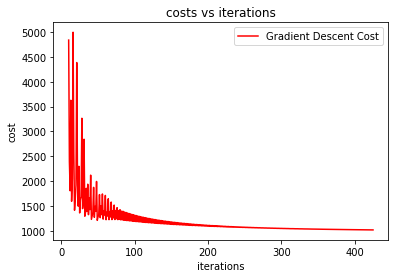

In [842]:
print("Min Cost: " + str(min(costs)))
print("Max Accuracy: " + str(max_acc))
plt.figure()
plt.title('costs vs iterations')
plt.plot([i for i in range(len(costs))][10:], costs[10:],'r-',label='Gradient Descent Cost')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend()

## (b) Stochastic Gradient Descent

In [843]:
n = X_train.shape[0]
d = X_train.shape[1]
w = np.array([0]*d)
e = 0.00007
lam = 0.05
alpha = 0.00000001
s = np.array([expit(np.dot(X_train[i],w)) for i in range(n)])

In [844]:
costs  = [[],[],[],[]]

prev_acc = float('inf')
acc = 1
strikes = 0
max_acc = [-float('inf') for _ in range(4)]
max_w = [[] for _ in range(4)]
# initialize
w_prev = np.array([-2]*d)
i = 0
for lam in [0.5,0.05,0.005,0.0005]:
    print("-"*10 + "Lambda: " + str(lam)+"-"*10)
    prev_acc = float('inf')
    j = 0
    while strikes < 200:
        costs[i].append(cost(y_train,w,lam,s))
        w_prev = w
        w,s = stochastic_update(X_train,w_prev,e,s,y_train,j)
        acc = compute_accuracy(X_val,w, y_val)
        if acc < prev_acc:
            strikes += 1
        if acc > max_acc[i]:
            max_acc[i] = acc
            max_w[i] = w
        print("Accuracy: " + str(acc))
        j += 1
        if j >= 5000:
            j = 0
        prev_acc = acc
    i += 1
    strikes = 0
    w = np.array([0]*d)

----------Lambda: 0.5----------
Cost: 3465.7359027999587
Accuracy: 0.73
Cost: 2721.1261321884917
Accuracy: 0.73
Cost: 2289.991285654068
Accuracy: 0.73
Cost: 2889.7049378756124
Accuracy: 0.73
Cost: 2307.873784175731
Accuracy: 0.73
Cost: 2085.462931981278
Accuracy: 0.73
Cost: 1982.3171321382017
Accuracy: 0.73
Cost: 1931.2324841119023
Accuracy: 0.73
Cost: 2672.994128832915
Accuracy: 0.73
Cost: 2137.117363111503
Accuracy: 0.73
Cost: 2002.2403596493268
Accuracy: 0.73
Cost: 1935.4042186279255
Accuracy: 0.73
Cost: 1900.7971920891573
Accuracy: 0.73
Cost: 1885.8201226839926
Accuracy: 0.73
Cost: 1957.578524263951
Accuracy: 0.73
Cost: 1911.0091072127602
Accuracy: 0.73
Cost: 1956.5031521140452
Accuracy: 0.73
Cost: 2680.3725178476116
Accuracy: 0.362
Cost: 3529.178105508107
Accuracy: 0.27
Cost: 4346.1989444529645
Accuracy: 0.731
Cost: 2922.3488687459094
Accuracy: 0.799
Cost: 3142.6796877477873
Accuracy: 0.73
Cost: 2498.5577757077426
Accuracy: 0.73
Cost: 2059.766464257155
Accuracy: 0.73
Cost: 1956.15

Accuracy: 0.756
Cost: 1758.876569504713
Accuracy: 0.751
Cost: 1755.2856227976683
Accuracy: 0.744
Cost: 1754.88202414231
Accuracy: 0.743
Cost: 1757.3998321629551
Accuracy: 0.741
Cost: 1763.8593148225887
Accuracy: 0.773
Cost: 1791.4172234973526
Accuracy: 0.76
Cost: 1767.094267419514
Accuracy: 0.752
Cost: 1755.0077955751608
Accuracy: 0.744
Cost: 1754.0382866806874
Accuracy: 0.743
Cost: 1755.2016483438672
Accuracy: 0.742
Cost: 1759.6181997841582
Accuracy: 0.751
Cost: 1750.003587373397
Accuracy: 0.744
Cost: 1752.2122759291387
Accuracy: 0.742
Cost: 1758.6621425894214
Accuracy: 0.745
Cost: 1750.88449749448
Accuracy: 0.753
Cost: 1744.9528819576913
Accuracy: 0.749
Cost: 1747.6187463217339
Accuracy: 0.745
Cost: 1750.7629233082496
Accuracy: 0.744
Cost: 1755.3004538604675
Accuracy: 0.742
Cost: 1760.9790193492202
Accuracy: 0.751
Cost: 1745.5253600633466
Accuracy: 0.786
Cost: 1778.8730083212845
Accuracy: 0.813
Cost: 1871.5696646981949
Accuracy: 0.794
Cost: 1796.5882456005627
Accuracy: 0.786
Cost: 17

Cost: 1734.1545661753303
Accuracy: 0.785
Cost: 1752.2640644558676
Accuracy: 0.793
Cost: 1695.8616378769493
Accuracy: 0.791
Cost: 1708.9099193963082
Accuracy: 0.791
Cost: 1711.9617677266729
Accuracy: 0.791
Cost: 1715.1908991574446
Accuracy: 0.79
Cost: 1719.7099289200662
Accuracy: 0.79
Cost: 1726.4255117766534
Accuracy: 0.786
Cost: 1740.5457768882343
Accuracy: 0.782
Cost: 1765.4898740815606
Accuracy: 0.78
Cost: 1771.8659401628329
Accuracy: 0.776
Cost: 1785.7239947242435
Accuracy: 0.77
Cost: 1813.8865562508433
Accuracy: 0.767
Cost: 1829.688718240062
Accuracy: 0.774
Cost: 1802.348334729801
Accuracy: 0.773
Cost: 1808.0284526154865
Accuracy: 0.779
Cost: 1790.172506047824
Accuracy: 0.778
Cost: 1793.2272530319194
Accuracy: 0.773
Cost: 1811.5581801492308
Accuracy: 0.769
Cost: 1831.0221621511046
Accuracy: 0.769
Cost: 1832.2153236155907
Accuracy: 0.792
Cost: 1713.9499381347985
Accuracy: 0.791
Cost: 1719.8357279063416
Accuracy: 0.791
Cost: 1725.0144959147851
Accuracy: 0.792
Cost: 1713.223679218317

Accuracy: 0.739
Cost: 1780.727125989633
Accuracy: 0.75
Cost: 1803.7180489773436
Accuracy: 0.742
Cost: 1784.2848889133425
Accuracy: 0.741
Cost: 1776.695569376407
Accuracy: 0.741
Cost: 1775.5902877918297
Accuracy: 0.738
Cost: 1779.8739189550545
Accuracy: 0.733
Cost: 1790.7068863963825
Accuracy: 0.733
Cost: 1793.5095082153316
Accuracy: 0.733
Cost: 1805.2640141974541
Accuracy: 0.733
Cost: 1814.7793701209725
Accuracy: 0.732
Cost: 1821.5382726883158
Accuracy: 0.742
Cost: 1782.685187256488
Accuracy: 0.741
Cost: 1777.220460584238
Accuracy: 0.742
Cost: 1775.8228576244023
Accuracy: 0.74
Cost: 1776.173452324443
Accuracy: 0.741
Cost: 1774.5650590574617
Accuracy: 0.742
Cost: 1773.9349665715745
Accuracy: 0.739
Cost: 1777.3727901247946
Accuracy: 0.738
Cost: 1784.235817935136
Accuracy: 0.733
Cost: 1795.3039960259973
Accuracy: 0.733
Cost: 1799.8861656871368
Accuracy: 0.733
Cost: 1814.0776251031716
Accuracy: 0.737
Cost: 1788.0048771547129
Accuracy: 0.742
Cost: 1765.903259946139
Accuracy: 0.741
Cost: 176

Accuracy: 0.841
Cost: 1697.7007890161017
Accuracy: 0.835
Cost: 1677.8504022851394
Accuracy: 0.827
Cost: 1664.065249696109
Accuracy: 0.821
Cost: 1658.3821958404783
Accuracy: 0.897
Cost: 1913.6070544120994
Accuracy: 0.867
Cost: 1781.4188235652862
Accuracy: 0.848
Cost: 1713.7710288112871
Accuracy: 0.835
Cost: 1675.9311465863138
Accuracy: 0.826
Cost: 1662.2463101886449
Accuracy: 0.821
Cost: 1658.8144811898726
Accuracy: 0.827
Cost: 1662.2837379745795
Accuracy: 0.824
Cost: 1656.32902503981
Accuracy: 0.811
Cost: 1656.8530089077474
Accuracy: 0.835
Cost: 1665.0997325538588
Accuracy: 0.83
Cost: 1660.020165933597
Accuracy: 0.826
Cost: 1654.4072677341503
Accuracy: 0.816
Cost: 1652.4267707657655
Accuracy: 0.811
Cost: 1656.173930322775
Accuracy: 0.803
Cost: 1667.1225497118367
Accuracy: 0.797
Cost: 1677.4499590969526
Accuracy: 0.796
Cost: 1680.914063203015
Accuracy: 0.795
Cost: 1682.355697418905
Accuracy: 0.807
Cost: 1661.4027323951257
Accuracy: 0.805
Cost: 1664.9287760726463
Accuracy: 0.809
Cost: 16

Accuracy: 0.733
Cost: 1787.4999662797102
Accuracy: 0.742
Cost: 1801.0304250716613
Accuracy: 0.741
Cost: 1789.169709548775
Accuracy: 0.742
Cost: 1783.786445837753
Accuracy: 0.738
Cost: 1781.561510262032
Accuracy: 0.738
Cost: 1781.5900697578022
Accuracy: 0.735
Cost: 1782.8862463019666
Accuracy: 0.733
Cost: 1790.1866869444818
Accuracy: 0.733
Cost: 1793.4524033894545
Accuracy: 0.732
Cost: 1807.2958556811354
Accuracy: 0.732
Cost: 1820.782083218957
Accuracy: 0.732
Cost: 1829.1616403044668
Accuracy: 0.732
Cost: 1831.2262370461553
Accuracy: 0.742
Cost: 1783.6674678019424
Accuracy: 0.739
Cost: 1781.0626606726198
Accuracy: 0.737
Cost: 1782.2880396713392
Accuracy: 0.744
Cost: 1803.9675613986153
Accuracy: 0.741
Cost: 1787.0187464340368
Accuracy: 0.742
Cost: 1782.6596009986579
Accuracy: 0.739
Cost: 1780.6548841487809
Accuracy: 0.751
Cost: 1803.6341381854
Accuracy: 0.743
Cost: 1784.195913283652
Accuracy: 0.741
Cost: 1776.6142358802977
Accuracy: 0.741
Cost: 1775.5133905985774
Accuracy: 0.738
Cost: 17

Accuracy: 0.793
Cost: 1685.8600947648044
Accuracy: 0.792
Cost: 1693.5913443410684
Accuracy: 0.791
Cost: 1701.9653880183612
Accuracy: 0.79
Cost: 1706.8421441581415
Accuracy: 0.788
Cost: 1713.7313210326465
Accuracy: 0.786
Cost: 1720.7609025089703
Accuracy: 0.786
Cost: 1723.2693137926158
Accuracy: 0.785
Cost: 1729.6137711507736
Accuracy: 0.798
Cost: 1676.7164766363528
Accuracy: 0.792
Cost: 1695.3271087644387
Accuracy: 0.791
Cost: 1705.53119794487
Accuracy: 0.786
Cost: 1725.39492631505
Accuracy: 0.826
Cost: 1666.3058868180872
Accuracy: 0.812
Cost: 1661.6818297481145
Accuracy: 0.863
Cost: 1780.9427588234132
Accuracy: 0.885
Cost: 1882.8261086631628
Accuracy: 0.876
Cost: 1820.3997406239068
Accuracy: 0.856
Cost: 1750.0568641579512
Accuracy: 0.841
Cost: 1697.4067630010984
Accuracy: 0.835
Cost: 1677.5674154955695
Accuracy: 0.827
Cost: 1663.7910369991093
Accuracy: 0.821
Cost: 1658.1147229294795
Accuracy: 0.897
Cost: 1913.1973489133181
Accuracy: 0.867
Cost: 1781.0889708969892
Accuracy: 0.848
Cost:

Cost: 1842.8418348104715
Accuracy: 0.732
Cost: 1813.7469702211115
Accuracy: 0.731
Cost: 1810.4064891625205
Accuracy: 0.731
Cost: 1810.7021837070738
Accuracy: 0.731
Cost: 1815.7046782194993
Accuracy: 0.731
Cost: 1819.4636084427268
Accuracy: 0.731
Cost: 1823.1682912607957
Accuracy: 0.731
Cost: 1808.124566627887
Accuracy: 0.731
Cost: 1814.2375533120437
Accuracy: 0.737
Cost: 1845.378166854332
Accuracy: 0.733
Cost: 1818.0748934006006
Accuracy: 0.738
Cost: 1836.866269488731
Accuracy: 0.733
Cost: 1816.0256711276554
Accuracy: 0.733
Cost: 1804.822280087258
Accuracy: 0.784
Cost: 2115.4809828348893
Accuracy: 0.792
Cost: 2162.8385819116957
Accuracy: 0.763
Cost: 1993.6050458065256
Accuracy: 0.752
Cost: 1925.3003905670662
Accuracy: 0.741
Cost: 1857.397343761784
Accuracy: 0.752
Cost: 1898.03693183965
Accuracy: 0.761
Cost: 1933.7974173383548
Accuracy: 0.745
Cost: 1863.568623107593
Accuracy: 0.742
Cost: 1837.321181183444
Accuracy: 0.74
Cost: 1806.2169264431848
Accuracy: 0.736
Cost: 1794.5270113806669
A

Accuracy: 0.777
Cost: 1725.9223210905286
Accuracy: 0.768
Cost: 1744.4129235581563
Accuracy: 0.773
Cost: 1733.6868804403227
Accuracy: 0.783
Cost: 1721.1196514243811
Accuracy: 0.78
Cost: 1723.4589774853337
Accuracy: 0.776
Cost: 1731.8299027106582
Accuracy: 0.771
Cost: 1745.581517303243
Accuracy: 0.766
Cost: 1772.1382654316428
Accuracy: 0.765
Cost: 1776.4854796488553
Accuracy: 0.763
Cost: 1786.2953450741384
Accuracy: 0.775
Cost: 1734.3326048271842
Accuracy: 0.791
Cost: 1692.1595514104702
Accuracy: 0.789
Cost: 1700.5528214550734
Accuracy: 0.786
Cost: 1709.7596432105415
Accuracy: 0.792
Cost: 1690.6584851586533
Accuracy: 0.791
Cost: 1697.4302550580344
Accuracy: 0.797
Cost: 1679.5721953853674
Accuracy: 0.811
Cost: 1674.0525262817628
Accuracy: 0.803
Cost: 1675.5240808681415
Accuracy: 0.795
Cost: 1682.8641240147256
Accuracy: 0.806
Cost: 1672.7266804251128
Accuracy: 0.825
Cost: 1677.2788888581074
Accuracy: 0.894
Cost: 1937.4877369601575
Accuracy: 0.864
Cost: 1807.4652760089787
Accuracy: 0.847
Co

Min Cost: (442, 1640.1853304945403)
lambda: 0.0005
Max Accuracy: 0.897
Min Cost: (0, 1637.7510278905077)
lambda: 0.0005
Max Accuracy: 0.897
Min Cost: (439, 1649.0608070692142)
lambda: 0.0005
Max Accuracy: 0.897
Min Cost: (0, 1644.0871384830227)
lambda: 0.0005
Max Accuracy: 0.897


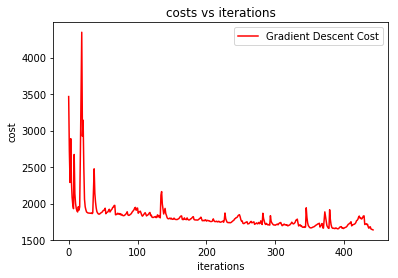

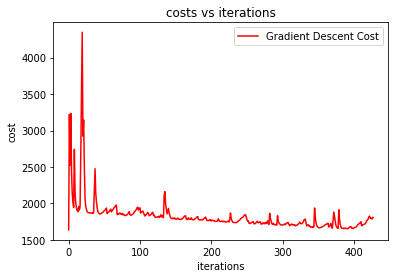

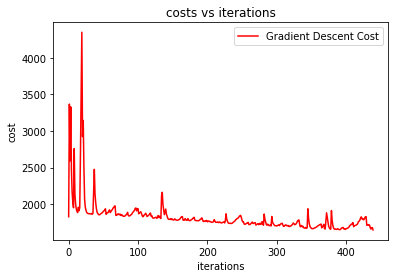

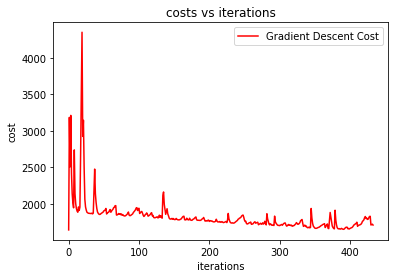

In [845]:
for i in range(len(costs)):
    print("Min Cost: " + str((costs[i].index(min(costs[i])), min(costs[i]))))
    print("lambda: " + str(lam))
    print("Max Accuracy: " + str(max_acc[i]))
    plt.figure()
    plt.title('costs vs iterations')
    plt.plot([i for i in range(len(costs[i]))], costs[i],'r-',label='Gradient Descent Cost')
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.legend()

## Decreasing Learning Rate

In [710]:
n = X_train.shape[0]
d = X_train.shape[1]
w = np.array([0]*d)
e = 0.05
lam = 0.5
alpha = 0.00001
s = np.array([expit(np.dot(X_train[i],w)) for i in range(n)])

In [711]:
costs  = []

# initialize
i = 1
e0 = e
w_prev = np.array([-2]*d)
j = 0
max_acc = -float('inf')
max_w = []
prev_acc = float('inf')
strikes = 0
diff = float('inf')
while diff > alpha:
    costs.append(cost(y_train,w,lam,s))
    w_prev = w
    w,s = stochastic_update(X_train,w_prev,e0,s,y_train,j)
    e0 = e / i
    i += 1
    j += 1
    if j >= 5000:
        j = 0
    acc = compute_accuracy(X_val,w, y_val)
    if acc < prev_acc:
            strikes += 1
    if acc < prev_acc:
        strikes += 1
    if acc > max_acc:
        max_acc = acc
        max_w = w
    prev_acc = acc
    diff = abs(norm(w)-norm(w_prev))
    print("Accuracy: " + str(acc))
    print("Diff: " + str(diff))

Cost: 3465.7359027999587
Accuracy: 0.759
Diff: 3.0113457037080615
Cost: nan
Accuracy: 0.759
Diff: 0.1505672851854034
Cost: nan
Accuracy: 0.759
Diff: 2.0774405708020383
Cost: 45060.15013001144
Accuracy: 0.759
Diff: 0.013055630795343554
Cost: 44309.15420326602
Accuracy: 0.759
Diff: 0.00962852771156597


c:\users\brent\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\users\brent\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


Cost: 43755.29552993434
Accuracy: 0.759
Diff: 0.0076065368921370835
Cost: 43317.74771094778
Accuracy: 0.759
Diff: 0.006275392936013091
Cost: 42956.771136408905
Accuracy: 0.759
Diff: 0.005334083995611083
Cost: 42649.941329083806
Accuracy: 0.799
Diff: 0.5727117255332416
Cost: 3964.717540106053
Accuracy: 0.799
Diff: 0.0009358094945038642
Cost: 3945.4780201432964
Accuracy: 0.798
Diff: 0.0007495966733262471
Cost: 3937.2609914670643
Accuracy: 0.241
Diff: 0.12808136358001448
Cost: nan
Accuracy: 0.759
Diff: 0.3752223832088276
Cost: 35215.4917385057
Accuracy: 0.759
Diff: 0.11020489489937757
Cost: 25426.372570387535
Accuracy: 0.759
Diff: 0.0020004978413511454
Cost: 25335.67801199676
Accuracy: 0.759
Diff: 0.0018604629924566796
Cost: 25251.332784331753
Accuracy: 0.815
Diff: 0.23128496322266245
Cost: 5897.574324982659
Accuracy: 0.815
Diff: 0.0009558616683236765
Cost: 5881.35346382578
Accuracy: 0.815
Diff: 0.0009000301892602702
Cost: 5866.090159210646
Accuracy: 0.815
Diff: 0.0008503609481438357
Cost

Cost: 1338.3855732362654
Accuracy: 0.925
Diff: 0.00010375733165818302
Cost: 1338.93529867218
Accuracy: 0.925
Diff: 9.126310515039648e-05
Cost: 1341.670662036907
Accuracy: 0.924
Diff: 3.085164293509246e-05
Cost: 1355.6163933158161
Accuracy: 0.92
Diff: 1.266266156962903e-05
Cost: 1379.1591932916142
Accuracy: 0.92
Diff: 5.022584281078046e-05
Cost: 1406.8552287930668
Accuracy: 0.913
Diff: 0.00014023343310304304
Cost: 1474.9865429560464
Accuracy: 0.913
Diff: 0.00010320752043119219
Cost: 1474.801711211784
Accuracy: 0.901
Diff: 0.0003319602066702565
Cost: 1705.2755107790856
Accuracy: 0.901
Diff: 9.885845375878777e-05
Cost: 1705.465832392419
Accuracy: 0.892
Diff: 0.0003107877966291306
Cost: 1900.468664123331
Accuracy: 0.892
Diff: 0.00010095359014211658
Cost: 1900.0130032703257
Accuracy: 0.891
Diff: 4.704198449761998e-05
Cost: 1910.578406334515
Accuracy: 0.892
Diff: 0.00015648522526218178
Cost: 1889.736247968932
Accuracy: 0.892
Diff: 9.825965566073736e-05
Cost: 1889.3742791953014
Accuracy: 0.89

Min Cost: (169, 1170.2313618222888)
Max Accuracy: 0.935


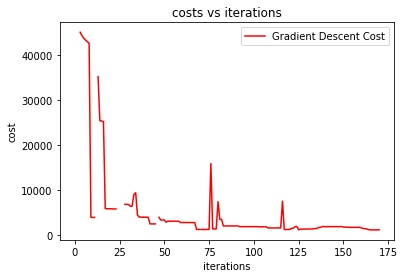

In [714]:
print("Min Cost: " + str((costs.index(min(costs)), min(costs))))
print("Max Accuracy: " + str(max_acc))
# costs = [c for c in costs if c < 4000]
plt.figure()
plt.title('costs vs iterations')
plt.plot([i for i in range(len(costs))], costs,'r-',label='Gradient Descent Cost')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend()

## Kaggle Submission

In [772]:
def predict(X,w):
    res = []
    for i in range(len(X)):
        a = np.dot(X[i],w)
        s = expit(a)
        p = 1 if s >= 0.5 else 0
        res.append(p)
    return res

In [863]:
w_kag = max_w

In [864]:
pred = predict(X_kag,w_kag)

In [767]:
t_ones = [[1] for _ in range(X_test.shape[0])]
X_kag = np.append(X_test,t_ones,1)

In [865]:
results_to_csv(np.array(pred))